# Marginal Stability Vehicle Sizing
This sheet uses <code>numpy, matplotlib, and simulations</code>.

<code>simulations</code> is developed and maintained (no promises) by Cameron. The current version of the code is 0.0.1 and can be downloaded from github [here](https://github.com/cmflannery/simulations). The source-code is not currently on pip.

In [5]:
import simulations as sim
import matplotlib.pyplot as plt
import numpy as np
import math as math
import tanksim
import unit_conversions as unit

In [6]:
def plot_alt(fig):
    # plot altitude
    ax1 = fig.add_subplot(3,1,1)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,kmaltitude)
    ax1.set_ylabel('Altitude (km)')

    ax1.set_title('Altitude and Velocity')

    # plot velocity
    kmVel = [x/1000 for x in velocity]
    ax2 = fig.add_subplot(3,1,2)
    ax2.xaxis.grid(linewidth=1.0)
    ax2.yaxis.grid(linewidth=1.0)
    ax2.grid(True, linewidth=1)
    ax2.plot(time,kmVel)
    ax2.set_ylabel('Velocity (km/s)')

    # plot acceleration
    gees = [x/g0 for x in acceleration]
    ax3 = fig.add_subplot(3,1,3)
    ax3.xaxis.grid(linewidth=1.0)
    ax3.yaxis.grid(linewidth=1.0)
    ax3.grid(True, linewidth=1)
    ax3.plot(time,gees)
    ax3.set_ylabel('Acceleration (gees)')
    ax3.set_xlabel('Time (s)')
    
def plot_thrust(fig):
    # plot thrust
    ax = fig.add_subplot(2,1,1)
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    ax.grid(True, linewidth=1)
    ax.plot(time,thrust)
    ax.set_ylabel('Thrust (N)')
    
    ax.set_title('Thrust and Drag')
    
    # plot drag
    ax1 = fig.add_subplot(2,1,2)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,drag)
    ax1.set_ylabel('Drag (N)')
    ax1.set_ylim(0,2e5)

In [117]:
burntime = 33# s

nengines = 1
thrust_sl = 5000  # lbf
Isp = 260 #s
mdot = nengines*thrust_sl/(Isp) #lbm/s
twratio = 50  # estimated thrust 2 weight ratio
mixtureratio = 2.23

mstructure = 152.4  # lbm
mavionics = 22  # lbm
msystems = 67.8 # lbm
mmisc = 25 #lbm
mengine = thrust_sl*nengines/(twratio) #lbm
mpropulsion = mengine + 10 # lbm
mpropellant = mdot*burntime

diameter = 8 #in

mRP1 = mpropellant / (mixtureratio + 1)
mLOx = mpropellant - mRP1

tankpressure = 750 #psi
fos = 4
pressurantdiameter = diameter - 2 #in
HEinitialpressure = 4500 #psi
HEfinalpressure = 50 #psi

tank = tanksim.tank(diameter,tankpressure,fos,pressurantdiameter,HEinitialpressure,HEfinalpressure,mLOx,mRP1)
tankSpecs = tank.tankCalc()
mtank = tankSpecs['tank_mass'] #lbm

if diameter == 8:
    refArea = .0325 #m^2
elif diameter == 15:
    refArea = .114 #m^2
else:
    refArea = .05 #m^2
#reference area of .05 for 10" rocket, .0325 for 8" rocket, .114 for 15" rocket

m0 = mpropulsion + mpropellant + mstructure + mavionics + msystems + mmisc + mtank

print('### STRUCTURAL PARAMETERS ###')
print('Propellant Mass = %.2f lbm' % mpropellant)
print('Propulsion Mass = %.2f lbm' % mpropulsion)
print('Tank Mass = %.2f lbm' % mtank)
print('Structural Mass (inc. Tank) = %.2f lbm' % (mstructure + mtank))
print('Systems Mass = %.2f lbm' % msystems)
print('Misc Mass = %.2f lbm' % mmisc)
print('Avionics Mass = %.2f lbm' % mavionics)
print('Mass Propellant Ratio (Mprop/M0) %.2f' % (mpropellant/m0))
print('Total Wet Mass: %.2f lbm' % (m0))
print('Total Dry Mass: %.2f lbm' % (m0-mpropellant))
print('\n### ENGINE PARAMETERS ###')
print('Thrust = %d lbf' % (thrust_sl*nengines))
print('Isp = %d s' % Isp)
print('mdot = %.2f lbm/s' % mdot)
print('Total Impulse = %i lbf-s' % (thrust_sl*burntime*nengines))

print('\n### OTHER IMPORTANT THINGS ###')
print('Burn Time = %.2f s' % burntime)

initialConditions = {
    'time': 0,
    'velocity': 0,
    'flight_angle': 0,
    'flight_heading': np.deg2rad(90),
    'latitude': 0,
    'longitude': 0,
    'altitude': 0,
    'mass': unit.lbToKg(m0),
    'heat': 0,
    'lift_coefficient': 0,
    'bank_angle': 0,
    'reference_area': refArea
}

engines = {
    'thrust_sl': unit.lbfToN(thrust_sl),
    'thrust_angle': 0,
    'Isp': Isp,
    'Ae': 0.25,
    'nengines': nengines
}

### STRUCTURAL PARAMETERS ###
Propellant Mass = 634.62 lbm
Propulsion Mass = 110.00 lbm
Tank Mass = 289.76 lbm
Structural Mass (inc. Tank) = 442.16 lbm
Systems Mass = 67.80 lbm
Misc Mass = 25.00 lbm
Avionics Mass = 22.00 lbm
Mass Propellant Ratio (Mprop/M0) 0.49
Total Wet Mass: 1301.58 lbm
Total Dry Mass: 666.96 lbm

### ENGINE PARAMETERS ###
Thrust = 5000 lbf
Isp = 260 s
mdot = 19.23 lbm/s
Total Impulse = 165000 lbf-s

### OTHER IMPORTANT THINGS ###
Burn Time = 33.00 s


In [118]:
itsatest = sim.Rocket(initialConditions, engines, burntime)
altitude, velocity, acceleration, mass, time, thrust, drag, Q, rho = itsatest.run()

Apogee = 103 km
Max Velocity = 1.30 km/s
Max Acceleration = 5.90 gees
Max Q = 151882.67 Pa
Max Drag = 3702.14 N
26
151882.66910368158
866.9738205662821
0.44419278394566686
10223.642995171245
35
88167.64277730642
1304.6525773188857
0.11343516350812355
19650.999430627387


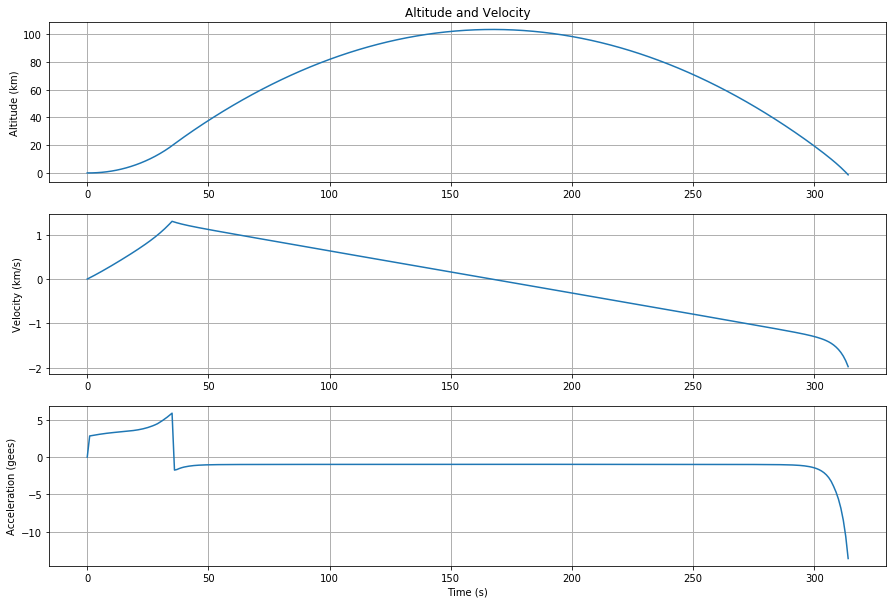

In [119]:
kmaltitude = [x/1000 for x in altitude]
print('Apogee = %d km' % max(kmaltitude))
kmvelocity = [v/1000 for v in velocity]
print('Max Velocity = %.2f km/s' % max(kmvelocity))
gees = [a/g0 for a in acceleration]
print('Max Acceleration = %.2f gees' % max(gees))
print('Max Q = %.2f Pa' % max(Q))
Drag = drag[0:len(Q)]
print('Max Drag = %.2f N' % max(Drag))

def maxAndTime(list):
    max = 0
    time = 0
    for i in range(len(Q)):
        if list[i] > max:
            max = list[i]
            time = i
    return (max,time)

maxQ,maxQTime = maxAndTime(Q)
print(maxQTime)
print(maxQ)
print(velocity[maxQTime])
print(rho[maxQTime])
print(altitude[maxQTime])

maxV,maxVTime = maxAndTime(velocity)
print(maxVTime)
print(Q[maxVTime])
print(maxV)
print(rho[maxVTime])
print(altitude[maxVTime])

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.2)

# fig2 = plt.figure(figsize=(15,10))
# fig2.subplots_adjust(hspace=0.2)

plot_alt(fig)
plt.show()

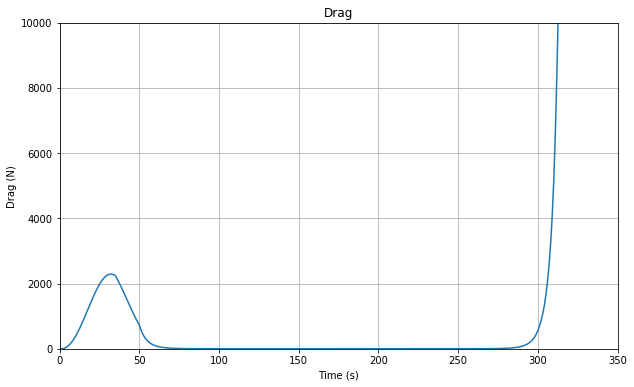

In [30]:
fig1 = plt.figure(figsize=(10,6))
ax11 = fig1.add_subplot(1,1,1)
ax11.plot(time,drag)
ax11.set_title('Drag')
ax11.set_xlabel('Time (s)')
ax11.set_ylabel('Drag (N)')
plt.axis([0,350,0,10000])
ax11.grid()
plt.show()